In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os, sys 
import json

aPath='/Users/liuchang/Documents/STUDY/AM207/Final Project/Data/data subset'
os.chdir(aPath)
os.path.dirname(os.path.abspath('biz.json'))

'/Users/liuchang/Documents/STUDY/AM207/Final Project/Data/data subset'

# Sample data for a Yelp business
{"business_id": "SQ0j7bgSTazkVQlF5AnqyQ", "full_address": "214 E Main St\nCarnegie\nCarnegie, PA 15106", "hours": {}, "open": true, "categories": ["Chinese", "Restaurants"], "city": "Carnegie", "review_count": 8, "name": "Don Don Chinese Restaurant", "neighborhoods": ["Carnegie"], "longitude": -80.084861000000004, "state": "PA", "stars": 2.5, "latitude": 40.408343000000002, "attributes": {"Take-out": true, "Alcohol": "none", "Noise Level": "quiet", "Parking": {"garage": false, "street": false, "validated": false, "lot": false, "valet": false}, "Delivery": true, "Has TV": true, "Outdoor Seating": false, "Attire": "casual", "Waiter Service": false, "Good For Groups": false, "Price Range": 1}, "type": "business"}

# Sample data for a Yelp user

{"yelping_since": "2004-10", "votes": {"funny": 166, "useful": 278, "cool": 245}, "review_count": 108, "name": "Russel", "user_id": "18kPq7GPye-YQ3LyKyAZPw", "friends": .... "fans": 69, "average_stars": 4.1399999999999997, "type": "user", "compliments": {"profile": 8, "cute": 15, "funny": 11, "plain": 25, "writer": 9, "note": 20, "photos": 15, "hot": 48, "cool": 78, "more": 3}, "elite": [2005, 2006]}

# Sample data for a Yelp review

{"votes": {"funny": 0, "useful": 1, "cool": 0}, "user_id": "uK8tzraOp4M5u3uYrqIBXg", "review_id": "KAkcn7oQP1xX8KsZ-XmktA", "stars": 4, "date": "2013-10-20", "text": "This place was very good. I found out about Emil's when watching a show called \"25 Things I Love About Pittsburgh\" on WQED hosted by Rick Seback. This place ain't a luxurious restaurant...it's a beer & a shot bar / lounge. But the people are friendly & the food is good. I had the fish sandwich which was great. It ain't in a great part of town, Rankin, but I've been in worse places!! Try this place.", "type": "review", "business_id": "mVHrayjG3uZ_RLHkLj-AMg"}

## brainstorming questions:

1. What attributes of users (mood, review counts, etc) tend to give high/lower ratings to a certain type of restaurants (cuisine, locations, money, service)?

For example, how does dependency of ?
define your model $P(D|\theta)$

response variable - covariates: 


hierarchical model
posterior paramenter/correlation distribution 

division into subproblems on the same theme or use different techniques to arrive at the same conclusion.
data augmentation
hidden labels/variable


2. What attributes of reviews (words, tones, etc) correlate with the ratings of the restaurant?


In [131]:
def open_json(json_file):
    with open(json_file) as f:
        for lines in f:
            #line = f.next()
            d = json.loads(lines)
            df = pd.DataFrame(columns=d.keys())
            
            # df[d.keys()[0]]= d[d.keys()[0]]
    return df

In [132]:
# list of files
biz_file ="/Users/liuchang/Documents/STUDY/AM207/Final Project/Data/data subset/biz.json"

review_file ="/Users/liuchang/Documents/STUDY/AM207/Final Project/Data/data subset/review.json"

checkin_file ="/Users/liuchang/Documents/STUDY/AM207/Final Project/Data/data subset/checkin.json"

tip_file ="/Users/liuchang/Documents/STUDY/AM207/Final Project/Data/data subset/tip.json"

user_file ="/Users/liuchang/Documents/STUDY/AM207/Final Project/Data/data subset/user.json"

In [134]:
text = "biz_file,review_file,checkin_file,tip_file,user_file".split(',')
for idx, i in enumerate([biz_file,review_file,checkin_file,tip_file,user_file]): 
    headers = open_json(i)
    print text[idx]
    print headers
    print        

biz_file
Empty DataFrame
Columns: [city, review_count, name, neighborhoods, type, business_id, full_address, hours, state, longitude, stars, latitude, attributes, open, categories]
Index: []

review_file
Empty DataFrame
Columns: [votes, user_id, review_id, text, business_id, stars, date, type]
Index: []

checkin_file
Empty DataFrame
Columns: [checkin_info, type, business_id]
Index: []

tip_file
Empty DataFrame
Columns: [user_id, text, business_id, likes, date, type]
Index: []

user_file
Empty DataFrame
Columns: [yelping_since, votes, user_id, name, elite, type, compliments, fans, average_stars, review_count, friends]
Index: []



In [110]:
print type("biz_file,review_file,checkin_file,tip_file,user_file".split(',')[0])

<type 'str'>


In [15]:
json_file="/Users/liuchang/Documents/STUDY/AM207/Final Project/Data/data subset/biz.json"
biz =pd.io.json.read_json(json_file,orient='Dataframe')
biz

ValueError: Trailing data

In [5]:
import pandas as pd
import os
os.path.dirname(os.path.realpath("yelp_academic_dataset_business.json"))
os.chdir("")


'/Users/liuchang/Documents/STUDY/Projects'

In [12]:
import json

def load_json_file(file_path):
    """
    Builds a list of dictionaries from a JSON file

    :type file_path: string
    :param file_path: the path for the file that contains the businesses
    data
    :return: a list of dictionaries with the data from the files
    """
    records = [json.loads(line) for line in open(file_path)]

    return records

def tf_idf_tips(file_path):
    records = load_json_file(file_path)
    print type(records),type(records[4])

    data = [record['stars'] for record in records if 'Restaurants' in record['categories']]

    return data


tip_matrix = tf_idf_tips("yelp_academic_dataset_business.json")


<type 'list'> <type 'dict'>


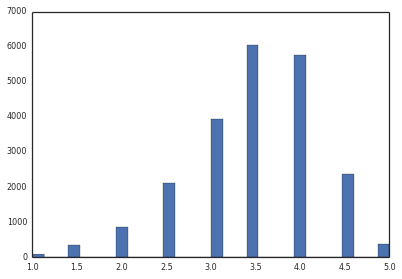

In [14]:
scores = tip_matrix
plt.hist(scores,bins=30)
plt.show()

In [15]:
import numpy as np
import numpy.random as npr
import pylab

def bootstrap(data, num_samples, statistic, alpha):
    """Returns bootstrap estimate of 100.0*(1-alpha) CI for statistic."""
    n = len(data)
    idx = npr.randint(0, n, (num_samples, n))
    samples = data[idx]
    stat = np.sort(statistic(samples, 1))
    return (stat[int((alpha/2.0)*num_samples)],
            stat[int((1-alpha/2.0)*num_samples)])

if __name__ == '__main__':
    # data of interest is bimodal and obviously not normal
    #x = np.concatenate([npr.normal(3, 1, 100), npr.normal(6, 2, 200)])
    x = scores
    # find mean 95% CI and 100,000 bootstrap samples
    low, high = bootstrap(x, 100000, np.mean, 0.05)

    # make plots
    pylab.figure(figsize=(15,10))
    pylab.subplot(121)
    pylab.hist(x, 50)
    pylab.title('Historgram of data')
    pylab.subplot(122)
    pylab.plot([-0.03,0.03], [np.mean(x), np.mean(x)], 'r', linewidth=2)
    pylab.scatter(0.1*(npr.random(len(x))-0.5), x)
    pylab.plot([0.19,0.21], [low, low], 'r', linewidth=2)
    pylab.plot([0.19,0.21], [high, high], 'r', linewidth=2)
    pylab.plot([0.2,0.2], [low, high], 'r', linewidth=2)
    pylab.xlim([-0.2, 0.3])
    pylab.title('Bootstrap 95% CI for mean')
    #pylab.savefig('examples/boostrap.png')

TypeError: only integer arrays with one element can be converted to an index

In [8]:
len(x)

300